# How Is vertical acceleration related to road profile?

In [1]:
import numpy as np  # python numerical library
import matplotlib.pyplot as plt  # python plotting library
#import scipy.signal as sig  # python signal library
#import pandas as pd  # python stats library
import piri  # fortran compiled library to calc IRI


In [2]:
%matplotlib inline

## Define the profile (ala TxDOT profiler)

Metric units are used for the profiles. 

In [3]:
D = 0.1  # mile
D *= 1600 # section length, m
d = 3*25.4/1000  # spacing between profile measurements, m
n = int(D/d)  # number of samples
fs = int(1/d)  # sampling frequency per distance meter  
(D, d, n, fs)

(160.0, 0.07619999999999999, 2099, 13)

## Assume a sinusoidal profile

Vary the amplitude and wavelength to examine the effect on vehicle vertical acceleartion

In [4]:
# A = wave amplitude, m
# w = wavelength, m/cycle

(A, w) = (0.02, 60)
#(A, w) = (0.005, 15)
#(A, w) = (0.001, 3)    
# x = np.linspace(0, D, fs*D)
x = np.linspace(0, D, n)
y = A*np.sin(2*np.pi*x/w)
p = y.copy()  # since getpi filters the profile

In [5]:
v = 1/w  # spatial frequency or wave number, cycle/m 
k = 2*np.pi/w  # angular wave number, m 
v, k

(0.016666666666666666, 0.10471975511965977)

### Unfiltered profile

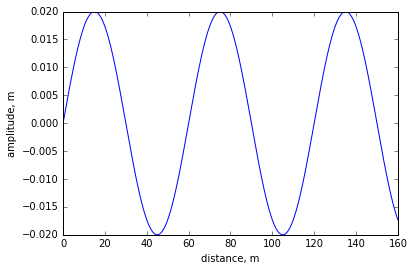

In [6]:
plt.plot(x, y)
plt.xlabel('distance, m')
plt.ylabel('amplitude, m')
plt.show()

In [7]:
slope = np.gradient(y,d)

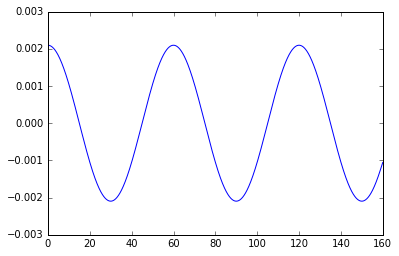

In [8]:
plt.plot(x, slope)

## Calc IRI

In [9]:
base = 0.25  # base length of moving average filter, m
pi = piri.getpi(p, 1/fs, base)
IRI = pi[2]*1000  # convert to m/km
round(IRI, 2)

0.13

In [10]:
pi[1]

2096

### Filtered profile (from getpi function)

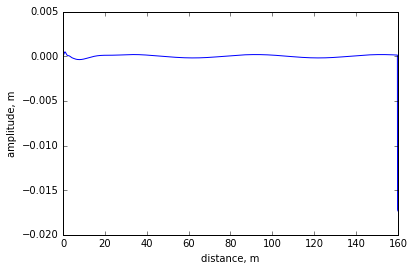

2096

In [11]:
plt.plot(x, p)
plt.xlabel('distance, m')
plt.ylabel('amplitude, m')
plt.show()
pi[1]  # number of samples in filtered profile

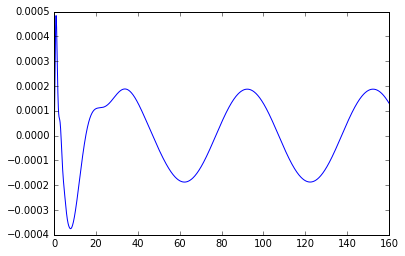

In [12]:
xx = np.linspace(0, D, pi[1]-1)
plt.plot(xx, pi[0][0:pi[1]-1])
plt.show()

## Calc the profile slope (spatial velocity)

The derivative of a sinusoid is a sinusoid with the same wavelength. The amplitude of the derivative of a sinusoid is:

$$\text{Slope amplitude } = \frac{2\pi A}{\lambda}$$

Amplitude $A$ and wavelength $\lambda$ have the same units, m. You could multiply m/m by 1000 to get m/km.

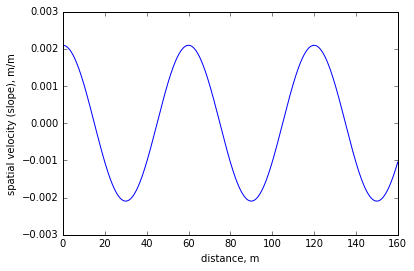

Spatial velocity (slope) amplitude = 2.094 m/km.


In [13]:
B = A*2*np.pi/w  # slope amplitude, m
yy = B*np.cos(2*np.pi*x/w)
plt.plot(x, yy)
plt.xlabel('distance, m')
plt.ylabel('spatial velocity (slope), m/m')
plt.show()
print('Spatial velocity (slope) amplitude = {0:.3f} m/km.'.format(B*1000))

## Calc the profile curvature (spatial acceleration)

The process of taking a derivative can be repeated a second time to get a spatial
acceleration sinusoid.

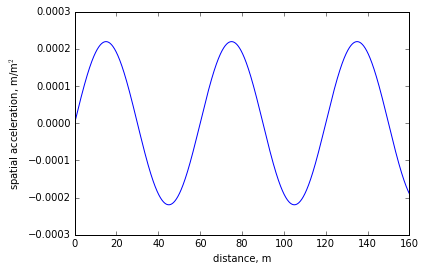

Spatial acceleration amplitude = 2.193e-01 m2/km.


In [14]:
C = B*2*np.pi/w  # spatial acceleration amplitude, m
yyy = C*np.sin(2*np.pi*x/w)
plt.plot(x, yyy)
plt.xlabel('distance, m')
plt.ylabel('spatial acceleration, m/m$^{2}$')
plt.show()

print('Spatial acceleration amplitude = {0:.3e} m2/km.'.format(C*1000))

## Vertical acceleration

Travel speed affects how vehicles see sinusoids in the road. A vehicle moving over the road “sees” a sinusoid at a frequency:

$$f = \frac{V}{\lambda}$$ 

In [15]:
V = 67  # vehicle speed in mph
V *= 1.6*1000/(60*60)  # m/s
f = V/w  # cycle/s
V, f

(29.777777777777775, 0.49629629629629624)

In [16]:
g = 9.80665  # vertical acceleration m/s2
a = A*(2*np.pi*f)**2/g
print('Peak vertical acceleration = {0:.2f} g'.format(a))

Peak vertical acceleration = 0.02 g
